# 数据预处理与特征工程

**学习目标**:
1. 掌握数据合并与拼接（merge, concat, join）
2. 学会处理缺失值（删除、填充、插值）
3. 掌握数据标准化与归一化
4. 学会使用正则表达式清洗文本数据
5. 掌握特征编码（Label Encoding, One-Hot Encoding）
6. 学会创建派生特征和交互特征

**预计时间**: 30-35分钟

## 第一部分: 导入库与数据准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子
np.random.seed(42)

print("✅ 库导入完成！")
print(f"Pandas版本: {pd.__version__}")
print(f"Scikit-learn可用")

✅ 库导入完成！
Pandas版本: 2.3.3
Scikit-learn可用


## 第二部分: 数据合并与拼接

### 2.1 merge() - SQL风格的连接

In [2]:
# 创建示例数据：用户信息表和订单表
users = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'city': ['北京', '上海', '广州', '深圳', '杭州'],
    'age': [25, 30, 28, 35, 27]
})

orders = pd.DataFrame({
    'order_id': [101, 102, 103, 104, 105, 106],
    'user_id': [1, 2, 2, 3, 3, 6],  # 注意：user_id=6在users表中不存在
    'product': ['手机', '电脑', '平板', '耳机', '手机', '相机'],
    'amount': [5000, 8000, 3000, 500, 5500, 12000]
})

print("用户表:")
print(users)
print("\n订单表:")
print(orders)

用户表:
   user_id     name city  age
0        1    Alice   北京   25
1        2      Bob   上海   30
2        3  Charlie   广州   28
3        4    David   深圳   35
4        5      Eve   杭州   27

订单表:
   order_id  user_id product  amount
0       101        1      手机    5000
1       102        2      电脑    8000
2       103        2      平板    3000
3       104        3      耳机     500
4       105        3      手机    5500
5       106        6      相机   12000


In [3]:
# 内连接 (INNER JOIN) - 只保留两表都有的记录
inner_join = pd.merge(users, orders, on='user_id', how='inner')

print("内连接 (INNER JOIN):")
print(inner_join)
print(f"\n结果行数: {len(inner_join)}")
print("💡 说明: 只保留user_id在两表中都存在的记录（1, 2, 3）")

内连接 (INNER JOIN):
   user_id     name city  age  order_id product  amount
0        1    Alice   北京   25       101      手机    5000
1        2      Bob   上海   30       102      电脑    8000
2        2      Bob   上海   30       103      平板    3000
3        3  Charlie   广州   28       104      耳机     500
4        3  Charlie   广州   28       105      手机    5500

结果行数: 5
💡 说明: 只保留user_id在两表中都存在的记录（1, 2, 3）


In [4]:
# 左连接 (LEFT JOIN) - 保留左表所有记录
left_join = pd.merge(users, orders, on='user_id', how='left')

print("左连接 (LEFT JOIN):")
print(left_join)
print(f"\n结果行数: {len(left_join)}")
print("💡 说明: 保留所有用户，没有订单的用户订单信息为NaN（David, Eve）")

左连接 (LEFT JOIN):
   user_id     name city  age  order_id product  amount
0        1    Alice   北京   25     101.0      手机  5000.0
1        2      Bob   上海   30     102.0      电脑  8000.0
2        2      Bob   上海   30     103.0      平板  3000.0
3        3  Charlie   广州   28     104.0      耳机   500.0
4        3  Charlie   广州   28     105.0      手机  5500.0
5        4    David   深圳   35       NaN     NaN     NaN
6        5      Eve   杭州   27       NaN     NaN     NaN

结果行数: 7
💡 说明: 保留所有用户，没有订单的用户订单信息为NaN（David, Eve）


In [5]:
# 右连接 (RIGHT JOIN) - 保留右表所有记录
right_join = pd.merge(users, orders, on='user_id', how='right')

print("右连接 (RIGHT JOIN):")
print(right_join)
print(f"\n结果行数: {len(right_join)}")
print("💡 说明: 保留所有订单，user_id=6的用户信息为NaN")

右连接 (RIGHT JOIN):
   user_id     name city   age  order_id product  amount
0        1    Alice   北京  25.0       101      手机    5000
1        2      Bob   上海  30.0       102      电脑    8000
2        2      Bob   上海  30.0       103      平板    3000
3        3  Charlie   广州  28.0       104      耳机     500
4        3  Charlie   广州  28.0       105      手机    5500
5        6      NaN  NaN   NaN       106      相机   12000

结果行数: 6
💡 说明: 保留所有订单，user_id=6的用户信息为NaN


In [6]:
# 全外连接 (FULL OUTER JOIN) - 保留两表所有记录
outer_join = pd.merge(users, orders, on='user_id', how='outer')

print("全外连接 (FULL OUTER JOIN):")
print(outer_join)
print(f"\n结果行数: {len(outer_join)}")
print("💡 说明: 保留所有用户和所有订单，缺失部分填充NaN")

全外连接 (FULL OUTER JOIN):
   user_id     name city   age  order_id product   amount
0        1    Alice   北京  25.0     101.0      手机   5000.0
1        2      Bob   上海  30.0     102.0      电脑   8000.0
2        2      Bob   上海  30.0     103.0      平板   3000.0
3        3  Charlie   广州  28.0     104.0      耳机    500.0
4        3  Charlie   广州  28.0     105.0      手机   5500.0
5        4    David   深圳  35.0       NaN     NaN      NaN
6        5      Eve   杭州  27.0       NaN     NaN      NaN
7        6      NaN  NaN   NaN     106.0      相机  12000.0

结果行数: 8
💡 说明: 保留所有用户和所有订单，缺失部分填充NaN


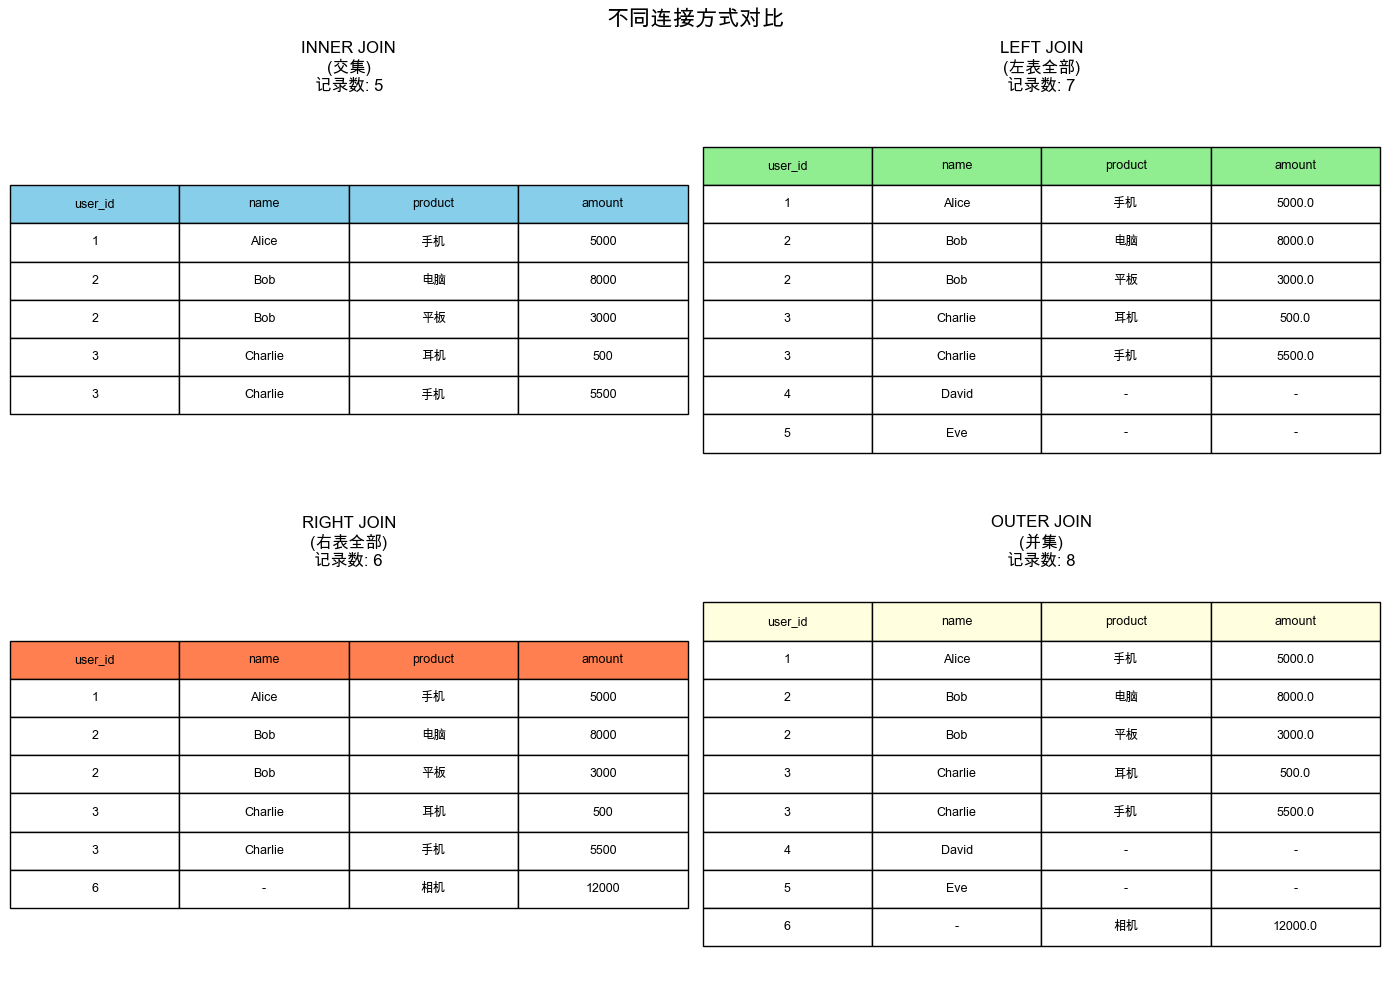

In [7]:
# 可视化不同连接方式的结果
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('不同连接方式对比', fontsize=16, fontweight='bold')

joins = [
    (inner_join, 'INNER JOIN\n(交集)', 'skyblue'),
    (left_join, 'LEFT JOIN\n(左表全部)', 'lightgreen'),
    (right_join, 'RIGHT JOIN\n(右表全部)', 'coral'),
    (outer_join, 'OUTER JOIN\n(并集)', 'lightyellow')
]

for idx, (df, title, color) in enumerate(joins):
    ax = axes[idx // 2, idx % 2]
    ax.axis('off')
    
    # 创建表格
    table_data = df[['user_id', 'name', 'product', 'amount']].fillna('-').values
    table = ax.table(cellText=table_data, 
                     colLabels=['user_id', 'name', 'product', 'amount'],
                     cellLoc='center', loc='center',
                     colColours=[color]*4)
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    ax.set_title(f"{title}\n记录数: {len(df)}", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.2 concat() - 按轴拼接

In [8]:
# 创建三个季度的销售数据
q1_sales = pd.DataFrame({
    'month': ['1月', '2月', '3月'],
    'sales': [100, 120, 115]
})

q2_sales = pd.DataFrame({
    'month': ['4月', '5月', '6月'],
    'sales': [130, 125, 140]
})

q3_sales = pd.DataFrame({
    'month': ['7月', '8月', '9月'],
    'sales': [145, 150, 148]
})

# 垂直拼接（增加行）
all_sales = pd.concat([q1_sales, q2_sales, q3_sales], axis=0, ignore_index=True)

print("垂直拼接（axis=0）:")
print(all_sales)
print(f"\n拼接后形状: {all_sales.shape}")

垂直拼接（axis=0）:
  month  sales
0    1月    100
1    2月    120
2    3月    115
3    4月    130
4    5月    125
5    6月    140
6    7月    145
7    8月    150
8    9月    148

拼接后形状: (9, 2)


In [9]:
# 创建不同指标的数据
sales_data = pd.DataFrame({
    'product': ['A', 'B', 'C'],
    'sales': [100, 200, 150]
})

profit_data = pd.DataFrame({
    'profit': [20, 50, 30],
    'margin': [0.2, 0.25, 0.2]
})

# 水平拼接（增加列）
combined = pd.concat([sales_data, profit_data], axis=1)

print("水平拼接（axis=1）:")
print(combined)
print(f"\n拼接后形状: {combined.shape}")

水平拼接（axis=1）:
  product  sales  profit  margin
0       A    100      20    0.20
1       B    200      50    0.25
2       C    150      30    0.20

拼接后形状: (3, 4)


## 第三部分: 缺失值处理

### 3.1 缺失值检测

In [10]:
# 创建包含缺失值的数据集
np.random.seed(42)
n = 100

df_missing = pd.DataFrame({
    'age': np.random.randint(18, 70, n),
    'income': np.random.normal(50000, 15000, n),
    'credit_score': np.random.randint(300, 850, n),
    'employment_years': np.random.randint(0, 30, n),
    'city': np.random.choice(['北京', '上海', '广州', '深圳'], n)
})

# 随机引入缺失值
df_missing.loc[np.random.choice(df_missing.index, 15), 'age'] = np.nan
df_missing.loc[np.random.choice(df_missing.index, 20), 'income'] = np.nan
df_missing.loc[np.random.choice(df_missing.index, 10), 'credit_score'] = np.nan
df_missing.loc[np.random.choice(df_missing.index, 5), 'city'] = np.nan

print("数据预览（前10行）:")
print(df_missing.head(10))

print("\n缺失值统计:")
missing_stats = pd.DataFrame({
    '缺失数量': df_missing.isnull().sum(),
    '缺失比例': (df_missing.isnull().sum() / len(df_missing) * 100).round(2)
})
print(missing_stats)

数据预览（前10行）:
    age    income  credit_score  employment_years city
0  56.0  21864.85         597.0                12   北京
1  69.0  29498.27         562.0                19   上海
2  46.0  59544.58         443.0                 0   北京
3  32.0  36399.19         645.0                 7   北京
4  60.0  57140.64         301.0                13   上海
5  25.0  69554.92         603.0                15   深圳
6  38.0  53173.81         553.0                13   北京
7  56.0  58955.67         752.0                11   广州
8  36.0  36554.97           NaN                18   北京
9   NaN  48320.18         459.0                22   上海

缺失值统计:
                  缺失数量  缺失比例
age                 12  12.0
income              15  15.0
credit_score         9   9.0
employment_years     0   0.0
city                 5   5.0


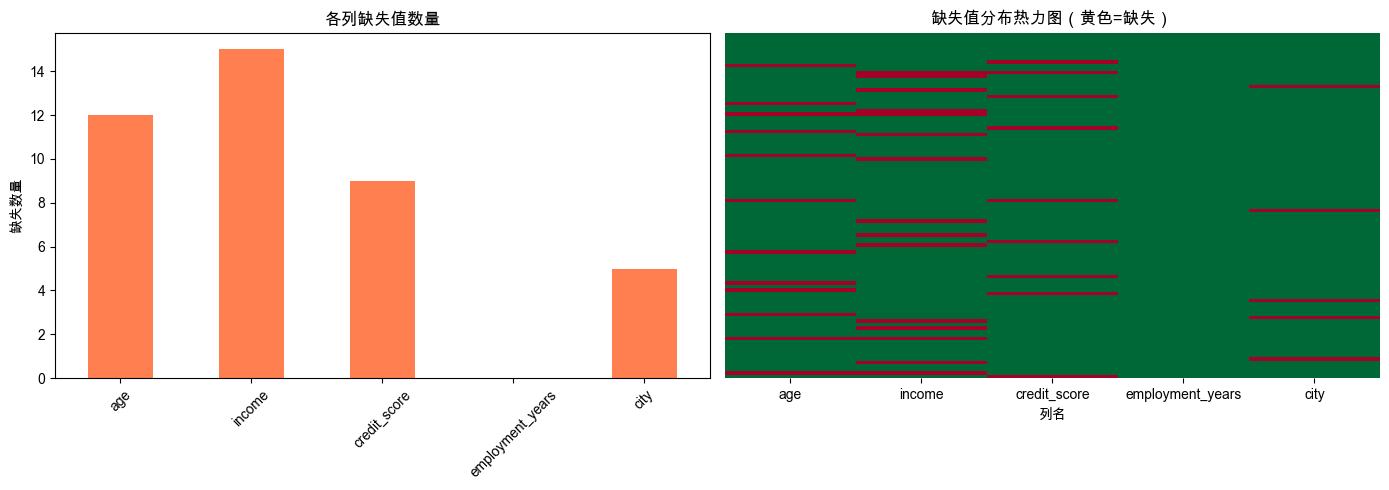

💡 观察: income列缺失最多（20%），需要重点处理


In [11]:
# 可视化缺失值模式
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：缺失值柱状图
missing_counts = df_missing.isnull().sum()
missing_counts.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('各列缺失值数量', fontsize=12, fontweight='bold')
axes[0].set_ylabel('缺失数量')
axes[0].tick_params(axis='x', rotation=45)

# 右图：缺失值热力图
sns.heatmap(df_missing.isnull(), cbar=False, yticklabels=False, 
            cmap='RdYlGn_r', ax=axes[1])
axes[1].set_title('缺失值分布热力图（黄色=缺失）', fontsize=12, fontweight='bold')
axes[1].set_xlabel('列名')

plt.tight_layout()
plt.show()

print("💡 观察: income列缺失最多（20%），需要重点处理")

### 3.2 缺失值处理策略

In [12]:
# 策略1: 删除缺失值
df_dropped = df_missing.dropna()

print("策略1: 删除所有含缺失值的行")
print(f"原始数据: {len(df_missing)} 行")
print(f"删除后: {len(df_dropped)} 行")
print(f"损失: {len(df_missing) - len(df_dropped)} 行 ({(len(df_missing) - len(df_dropped))/len(df_missing)*100:.1f}%)")

# 策略1变体：只删除关键列缺失的行
df_dropped_subset = df_missing.dropna(subset=['credit_score'])  # 信用分数是关键
print(f"\n只删除credit_score缺失的行: {len(df_dropped_subset)} 行保留")

策略1: 删除所有含缺失值的行
原始数据: 100 行
删除后: 64 行
损失: 36 行 (36.0%)

只删除credit_score缺失的行: 91 行保留


In [13]:
# 策略2: 填充缺失值（数值型）
df_filled_numeric = df_missing.copy()

# 均值填充
df_filled_numeric['age'] = df_filled_numeric['age'].fillna(df_filled_numeric['age'].mean())

# 中位数填充（对异常值不敏感）
df_filled_numeric['income'] = df_filled_numeric['income'].fillna(df_filled_numeric['income'].median())

# 众数填充
df_filled_numeric['credit_score'] = df_filled_numeric['credit_score'].fillna(df_filled_numeric['credit_score'].mode()[0])

print("策略2: 数值型填充")
print(f"age: 均值填充 = {df_missing['age'].mean():.2f}")
print(f"income: 中位数填充 = {df_missing['income'].median():.2f}")
print(f"credit_score: 众数填充 = {df_missing['credit_score'].mode()[0]:.0f}")
print(f"\n填充后缺失值: {df_filled_numeric.isnull().sum().sum()}")

策略2: 数值型填充
age: 均值填充 = 44.11
income: 中位数填充 = 49318.96
credit_score: 众数填充 = 398

填充后缺失值: 5


In [14]:
# 策略3: 填充缺失值（类别型）
df_filled_category = df_missing.copy()

# 用众数填充
df_filled_category['city'] = df_filled_category['city'].fillna(df_filled_category['city'].mode()[0])

# 或用特殊标记填充
# df_filled_category['city'] = df_filled_category['city'].fillna('未知')

print("策略3: 类别型填充")
print(f"city: 众数填充 = '{df_missing['city'].mode()[0]}'")
print(f"填充后city列缺失值: {df_filled_category['city'].isnull().sum()}")

策略3: 类别型填充
city: 众数填充 = '上海'
填充后city列缺失值: 0


/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_79878/2708423141.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_df['ffill'] = ts_df['value'].fillna(method='ffill')
/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_79878/2708423141.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_df['bfill'] = ts_df['value'].fillna(method='bfill')


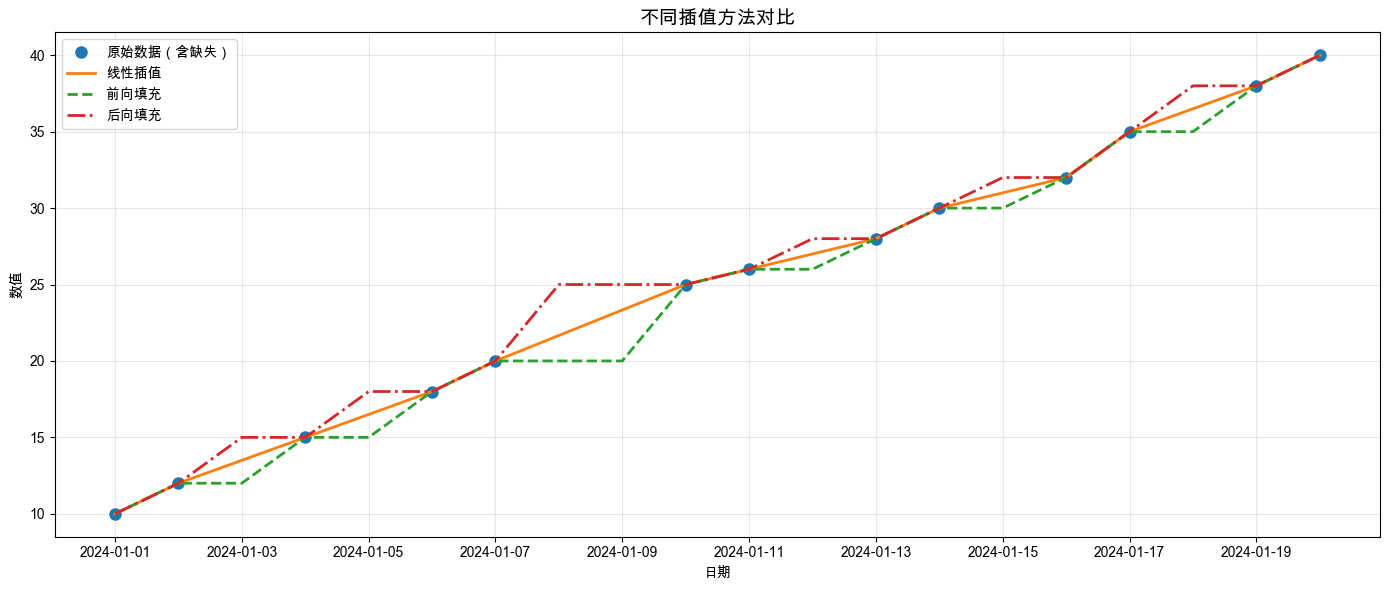

💡 时间序列插值:
  - 线性插值: 适合平滑趋势
  - 前向填充: 适合离散事件（如库存水平）
  - 后向填充: 适合预测性场景


In [15]:
# 策略4: 插值填充（适用于时间序列）
# 创建时间序列数据示例
dates = pd.date_range('2024-01-01', periods=20, freq='D')
values = [10, 12, np.nan, 15, np.nan, 18, 20, np.nan, np.nan, 25, 
          26, np.nan, 28, 30, np.nan, 32, 35, np.nan, 38, 40]

ts_df = pd.DataFrame({'date': dates, 'value': values})

# 线性插值
ts_df['linear'] = ts_df['value'].interpolate(method='linear')

# 前向填充
ts_df['ffill'] = ts_df['value'].fillna(method='ffill')

# 后向填充
ts_df['bfill'] = ts_df['value'].fillna(method='bfill')

# 可视化不同插值方法
plt.figure(figsize=(14, 6))
plt.plot(ts_df['date'], ts_df['value'], 'o', label='原始数据（含缺失）', markersize=8)
plt.plot(ts_df['date'], ts_df['linear'], '-', label='线性插值', linewidth=2)
plt.plot(ts_df['date'], ts_df['ffill'], '--', label='前向填充', linewidth=2)
plt.plot(ts_df['date'], ts_df['bfill'], '-.', label='后向填充', linewidth=2)

plt.title('不同插值方法对比', fontsize=14, fontweight='bold')
plt.xlabel('日期')
plt.ylabel('数值')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💡 时间序列插值:")
print("  - 线性插值: 适合平滑趋势")
print("  - 前向填充: 适合离散事件（如库存水平）")
print("  - 后向填充: 适合预测性场景")

## 第四部分: 数据标准化与归一化

### 4.1 为什么需要标准化？

In [16]:
# 创建不同量级的特征
np.random.seed(42)

data_scale = pd.DataFrame({
    'age': np.random.randint(20, 60, 100),           # 20-60
    'income': np.random.randint(30000, 150000, 100), # 30000-150000
    'credit_score': np.random.randint(300, 850, 100) # 300-850
})

print("原始数据统计:")
print(data_scale.describe())

print("\n💡 问题: income的数值范围远大于age，会主导模型训练")

原始数据统计:
          age     income  credit_score
count  100.00     100.00        100.00
mean    38.79   95803.67        570.14
std     11.56   35731.38        150.39
min     20.00   30206.00        301.00
25%     28.00   64531.25        445.25
50%     39.50   98027.00        564.50
75%     47.25  125404.00        702.00
max     59.00  149324.00        815.00

💡 问题: income的数值范围远大于age，会主导模型训练


### 4.2 Min-Max归一化（缩放到[0, 1]）

In [17]:
# Min-Max归一化
scaler_minmax = MinMaxScaler()
# fit_transform 拟合并转换
data_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(data_scale),
    columns=data_scale.columns
)

print("Min-Max归一化后:")
print(data_minmax.describe())

print("\n公式: X_scaled = (X - X_min) / (X_max - X_min)")
print("特点: 所有特征都在[0, 1]范围内")

Min-Max归一化后:
          age  income  credit_score
count  100.00  100.00        100.00
mean     0.48    0.55          0.52
std      0.30    0.30          0.29
min      0.00    0.00          0.00
25%      0.21    0.29          0.28
50%      0.50    0.57          0.51
75%      0.70    0.80          0.78
max      1.00    1.00          1.00

公式: X_scaled = (X - X_min) / (X_max - X_min)
特点: 所有特征都在[0, 1]范围内


### 4.3 Z-score标准化（均值0，标准差1）

In [18]:
# Z-score标准化
scaler_standard = StandardScaler()
data_standard = pd.DataFrame(
    scaler_standard.fit_transform(data_scale),
    columns=data_scale.columns
)

print("Z-score标准化后:")
print(data_standard.describe())

print("\n公式: X_scaled = (X - mean) / std")
print("特点: 均值≈0，标准差≈1")

Z-score标准化后:
            age    income  credit_score
count  1.00e+02  1.00e+02      1.00e+02
mean   8.22e-17  3.83e-17      1.22e-16
std    1.01e+00  1.01e+00      1.01e+00
min   -1.63e+00 -1.85e+00     -1.80e+00
25%   -9.38e-01 -8.80e-01     -8.35e-01
50%    6.17e-02  6.25e-02     -3.77e-02
75%    7.36e-01  8.33e-01      8.81e-01
max    1.76e+00  1.51e+00      1.64e+00

公式: X_scaled = (X - mean) / std
特点: 均值≈0，标准差≈1


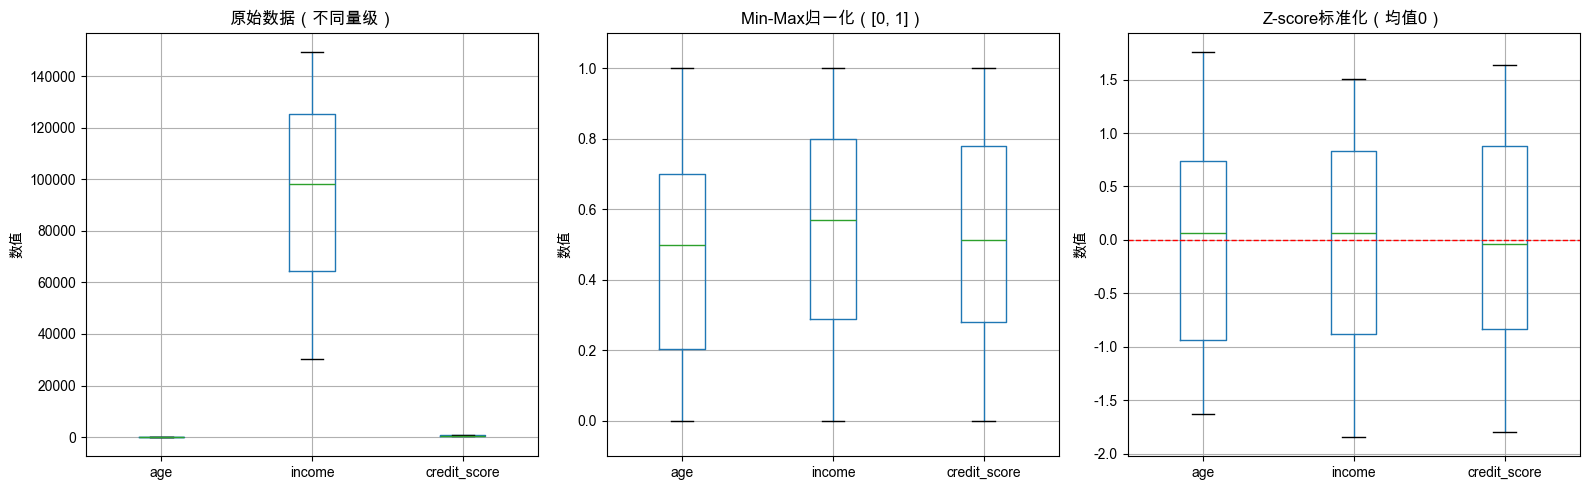


💡 使用建议:
  - Min-Max: 数据有明确边界，不受异常值影响
  - Z-score: 数据接近正态分布，需要保留分布形态
  - 决策树/随机森林: 不需要标准化
  - 线性模型/神经网络/KNN: 需要标准化


In [19]:
# 可视化对比
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 原始数据
data_scale.boxplot(ax=axes[0])
axes[0].set_title('原始数据（不同量级）', fontsize=12, fontweight='bold')
axes[0].set_ylabel('数值')

# Min-Max归一化
data_minmax.boxplot(ax=axes[1])
axes[1].set_title('Min-Max归一化（[0, 1]）', fontsize=12, fontweight='bold')
axes[1].set_ylabel('数值')
axes[1].set_ylim(-0.1, 1.1)

# Z-score标准化
data_standard.boxplot(ax=axes[2])
axes[2].set_title('Z-score标准化（均值0）', fontsize=12, fontweight='bold')
axes[2].set_ylabel('数值')
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("\n💡 使用建议:")
print("  - Min-Max: 数据有明确边界，不受异常值影响")
print("  - Z-score: 数据接近正态分布，需要保留分布形态")
print("  - 决策树/随机森林: 不需要标准化")
print("  - 线性模型/神经网络/KNN: 需要标准化")

## 第五部分: 文本数据清洗（正则表达式）

### 5.1 提取数字和字母

In [20]:
# 创建包含混乱文本的数据
text_data = pd.DataFrame({
    'product_name': [
        'iPhone 14 Pro (128GB)',
        'MacBook Pro 16" - 512GB SSD',
        'AirPods Pro (第二代)',
        'iPad Air 5 - 64GB',
        'Apple Watch Series 8 (GPS + 蜂窝网络)'
    ],
    'price_text': [
        '¥7,999.00',
        '¥19,999.00',
        '¥1,899.00',
        '¥4,799.00',
        '¥3,199.00'
    ],
    'phone': [
        '13812345678',
        '138-1234-5679',
        '(+86) 138 1234 5680',
        '+86-138-1234-5681',
        '138.1234.5682'
    ]
})

print("原始文本数据:")
print(text_data)

原始文本数据:
                        product_name  price_text                phone
0              iPhone 14 Pro (128GB)   ¥7,999.00          13812345678
1        MacBook Pro 16" - 512GB SSD  ¥19,999.00        138-1234-5679
2                  AirPods Pro (第二代)   ¥1,899.00  (+86) 138 1234 5680
3                  iPad Air 5 - 64GB   ¥4,799.00    +86-138-1234-5681
4  Apple Watch Series 8 (GPS + 蜂窝网络)   ¥3,199.00        138.1234.5682


In [21]:
# 提取产品名称中的型号和容量
text_data['model'] = text_data['product_name'].str.extract(r'([A-Za-z]+\s*\d+)')
text_data['storage'] = text_data['product_name'].str.extract(r'(\d+GB)')

print("提取型号和容量:")
print(text_data[['product_name', 'model', 'storage']])

提取型号和容量:
                        product_name      model storage
0              iPhone 14 Pro (128GB)  iPhone 14   128GB
1        MacBook Pro 16" - 512GB SSD     Pro 16   512GB
2                  AirPods Pro (第二代)        NaN     NaN
3                  iPad Air 5 - 64GB      Air 5    64GB
4  Apple Watch Series 8 (GPS + 蜂窝网络)   Series 8     NaN


In [22]:
# 清洗价格数据（去除货币符号和逗号，转换为数值）
text_data['price_clean'] = text_data['price_text'].str.replace(r'[¥,]', '', regex=True).astype(float)

print("清洗价格数据:")
print(text_data[['price_text', 'price_clean']])
print(f"\n价格数据类型: {text_data['price_clean'].dtype}")

清洗价格数据:
   price_text  price_clean
0   ¥7,999.00       7999.0
1  ¥19,999.00      19999.0
2   ¥1,899.00       1899.0
3   ¥4,799.00       4799.0
4   ¥3,199.00       3199.0

价格数据类型: float64


In [23]:
# 统一电话号码格式
text_data['phone_clean'] = text_data['phone'].str.replace(r'[^\d]', '', regex=True)
text_data['phone_formatted'] = text_data['phone_clean'].str.replace(r'(\d{3})(\d{4})(\d{4})', r'\1-\2-\3', regex=True)

print("清洗电话号码:")
print(text_data[['phone', 'phone_formatted']])

清洗电话号码:
                 phone  phone_formatted
0          13812345678    138-1234-5678
1        138-1234-5679    138-1234-5679
2  (+86) 138 1234 5680  861-3812-345680
3    +86-138-1234-5681  861-3812-345681
4        138.1234.5682    138-1234-5682


### 5.2 常用正则表达式模式

In [24]:
# 常用正则表达式模式示例
test_strings = pd.DataFrame({
    'text': [
        'user@example.com',
        'invalid-email@',
        'http://www.example.com',
        'https://github.com/user/repo',
        '2024-01-15',
        '15/01/2024',
        '身份证: 110101199001011234'
    ]
})

# 验证邮箱格式
test_strings['is_email'] = test_strings['text'].str.match(r'^[\w\.-]+@[\w\.-]+\.\w+$')

# 验证URL格式
test_strings['is_url'] = test_strings['text'].str.match(r'^https?://[\w\.-]+')

# 提取日期（YYYY-MM-DD格式）
test_strings['date_extracted'] = test_strings['text'].str.extract(r'(\d{4}-\d{2}-\d{2})')

# 提取身份证号
test_strings['id_card'] = test_strings['text'].str.extract(r'(\d{18})')

print("正则表达式应用示例:")
print(test_strings)

print("\n💡 常用模式:")
print("  \\d: 匹配数字")
print("  \\w: 匹配字母、数字、下划线")
print("  \\s: 匹配空白字符")
print("  +: 1次或多次")
print("  *: 0次或多次")
print("  ?: 0次或1次")
print("  ^: 行首")
print("  $: 行尾")
print("  []: 字符集合")
print("  (): 捕获组")

正则表达式应用示例:
                           text  is_email  is_url date_extracted  \
0              user@example.com      True   False            NaN   
1                invalid-email@     False   False            NaN   
2        http://www.example.com     False    True            NaN   
3  https://github.com/user/repo     False    True            NaN   
4                    2024-01-15     False   False     2024-01-15   
5                    15/01/2024     False   False            NaN   
6       身份证: 110101199001011234     False   False            NaN   

              id_card  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6  110101199001011234  

💡 常用模式:
  \d: 匹配数字
  \w: 匹配字母、数字、下划线
  \s: 匹配空白字符
  +: 1次或多次
  *: 0次或多次
  ?: 0次或1次
  ^: 行首
  $: 行尾
  []: 字符集合
  (): 捕获组


## 第六部分: 特征编码

### 6.1 Label Encoding（序号编码）

In [25]:
# 创建有序类别数据
education_data = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'education': ['高中', '本科', '硕士', '本科', '博士']
})

print("原始数据:")
print(education_data)

# Label Encoding
le = LabelEncoder()
education_data['education_encoded'] = le.fit_transform(education_data['education'])

print("\nLabel Encoding后:")
print(education_data)
print(f"\n映射关系: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n⚠️ 注意: Label Encoding引入了顺序关系（0 < 1 < 2 < 3）")
print("只适用于有序类别（如教育程度、会员等级）")

原始数据:
      name education
0    Alice        高中
1      Bob        本科
2  Charlie        硕士
3    David        本科
4      Eve        博士

Label Encoding后:
      name education  education_encoded
0    Alice        高中                  3
1      Bob        本科                  1
2  Charlie        硕士                  2
3    David        本科                  1
4      Eve        博士                  0

映射关系: {'博士': 0, '本科': 1, '硕士': 2, '高中': 3}

⚠️ 注意: Label Encoding引入了顺序关系（0 < 1 < 2 < 3）
只适用于有序类别（如教育程度、会员等级）


### 6.2 One-Hot Encoding（独热编码）

In [26]:
# 创建无序类别数据
color_data = pd.DataFrame({
    'product': ['产品A', '产品B', '产品C', '产品D', '产品E'],
    'color': ['红', '蓝', '绿', '红', '蓝'],
    'size': ['小', '中', '大', '中', '小']
})

print("原始数据:")
print(color_data)

# One-Hot Encoding
color_onehot = pd.get_dummies(color_data, columns=['color', 'size'], drop_first=False)

print("\nOne-Hot Encoding后:")
print(color_onehot)

print("\n💡 优点: 不引入顺序关系，适用于无序类别")
print("⚠️ 缺点: 高基数类别会产生大量稀疏特征")

原始数据:
  product color size
0     产品A     红    小
1     产品B     蓝    中
2     产品C     绿    大
3     产品D     红    中
4     产品E     蓝    小

One-Hot Encoding后:
  product  color_红  color_绿  color_蓝  size_中  size_大  size_小
0     产品A     True    False    False   False   False    True
1     产品B    False    False     True    True   False   False
2     产品C    False     True    False   False    True   False
3     产品D     True    False    False    True   False   False
4     产品E    False    False     True   False   False    True

💡 优点: 不引入顺序关系，适用于无序类别
⚠️ 缺点: 高基数类别会产生大量稀疏特征


In [27]:
# drop_first=True 避免多重共线性
color_onehot_drop = pd.get_dummies(color_data, columns=['color', 'size'], drop_first=True)

print("One-Hot Encoding（drop_first=True）:")
print(color_onehot_drop)

print("\n💡 drop_first: 删除第一个类别列，避免虚拟变量陷阱")
print("例如: 如果color_红=0且color_蓝=0，则可推断color_绿=1")

One-Hot Encoding（drop_first=True）:
  product  color_绿  color_蓝  size_大  size_小
0     产品A    False    False   False    True
1     产品B    False     True   False   False
2     产品C     True    False    True   False
3     产品D    False    False   False   False
4     产品E    False     True   False    True

💡 drop_first: 删除第一个类别列，避免虚拟变量陷阱
例如: 如果color_红=0且color_蓝=0，则可推断color_绿=1


### 6.3 Frequency Encoding（频率编码）

In [28]:
# 创建高基数类别数据（如城市）
np.random.seed(42)
city_data = pd.DataFrame({
    'user_id': range(1, 101),
    'city': np.random.choice(['北京', '上海', '广州', '深圳', '杭州', '成都', '武汉', '西安'], 
                             100, p=[0.3, 0.25, 0.15, 0.1, 0.08, 0.06, 0.04, 0.02])
})

print("城市分布:")
print(city_data['city'].value_counts())

# Frequency Encoding
freq_map = city_data['city'].value_counts().to_dict()
city_data['city_frequency'] = city_data['city'].map(freq_map)

print("\nFrequency Encoding后（前10行）:")
print(city_data.head(10))

print("\n💡 适用场景: 高基数类别特征（如城市、用户ID）")
print("优点: 保留了类别的重要性信息，不增加维度")

城市分布:
city
北京    34
上海    25
深圳    12
广州    11
杭州     7
武汉     5
成都     5
西安     1
Name: count, dtype: int64

Frequency Encoding后（前10行）:
   user_id city  city_frequency
0        1   上海              25
1        2   武汉               5
2        3   深圳              12
3        4   广州              11
4        5   北京              34
5        6   北京              34
6        7   北京              34
7        8   杭州               7
8        9   广州              11
9       10   深圳              12

💡 适用场景: 高基数类别特征（如城市、用户ID）
优点: 保留了类别的重要性信息，不增加维度


## 第七部分: 特征工程

### 7.1 数值特征分箱

年龄分箱示例（前10行）:
   age age_bin_equal age_bin_quantile age_group
0   56           中老年               Q3     51-65
1   69            老年               Q5       65+
2   46            中年               Q3     36-50
3   32            年轻               Q2     26-35
4   60           中老年               Q4     51-65
5   25           很年轻               Q1     18-25
6   78            老年               Q5       65+
7   38            年轻               Q2     36-50
8   56           中老年               Q3     51-65
9   75            老年               Q5       65+


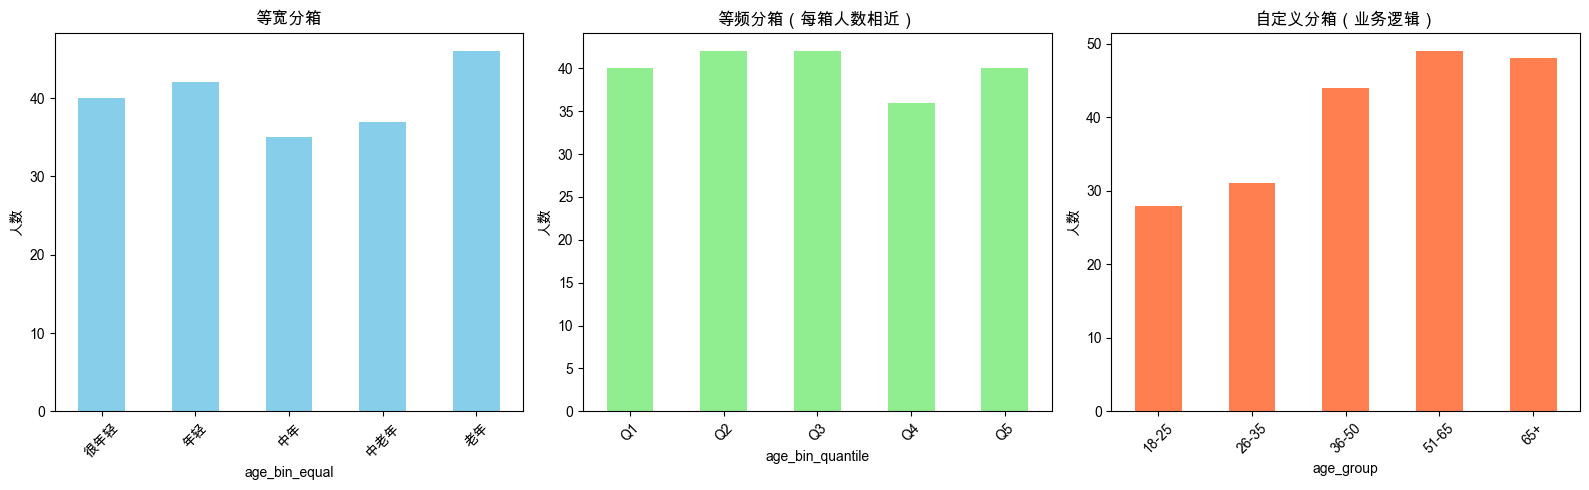


💡 分箱的作用:
  - 降低异常值影响
  - 捕捉非线性关系
  - 提高模型稳定性


In [29]:
# 创建年龄数据
np.random.seed(42)
age_data = pd.DataFrame({
    'age': np.random.randint(18, 80, 200)
})

# 等宽分箱
age_data['age_bin_equal'] = pd.cut(age_data['age'], bins=5, labels=['很年轻', '年轻', '中年', '中老年', '老年'])

# 等频分箱
age_data['age_bin_quantile'] = pd.qcut(age_data['age'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 自定义分箱
bins_custom = [0, 25, 35, 50, 65, 100]
labels_custom = ['18-25', '26-35', '36-50', '51-65', '65+']
age_data['age_group'] = pd.cut(age_data['age'], bins=bins_custom, labels=labels_custom)

print("年龄分箱示例（前10行）:")
print(age_data.head(10))

# 可视化分箱结果
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

age_data['age_bin_equal'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('等宽分箱', fontsize=12, fontweight='bold')
axes[0].set_ylabel('人数')
axes[0].tick_params(axis='x', rotation=45)

age_data['age_bin_quantile'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('等频分箱（每箱人数相近）', fontsize=12, fontweight='bold')
axes[1].set_ylabel('人数')
axes[1].tick_params(axis='x', rotation=45)

age_data['age_group'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title('自定义分箱（业务逻辑）', fontsize=12, fontweight='bold')
axes[2].set_ylabel('人数')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n💡 分箱的作用:")
print("  - 降低异常值影响")
print("  - 捕捉非线性关系")
print("  - 提高模型稳定性")

### 7.2 派生特征

In [30]:
# 创建示例数据
np.random.seed(42)
feature_data = pd.DataFrame({
    'height_cm': np.random.normal(170, 10, 100),
    'weight_kg': np.random.normal(65, 15, 100),
    'date': pd.date_range('2024-01-01', periods=100, freq='D'),
    'sales': np.random.gamma(50, 100, 100),
    'cost': np.random.gamma(30, 80, 100)
})

print("原始特征（前5行）:")
print(feature_data.head())

原始特征（前5行）:
   height_cm  weight_kg       date    sales     cost
0     174.97      43.77 2024-01-01  5223.11  1562.95
1     168.62      58.69 2024-01-02  5372.45  2151.53
2     176.48      59.86 2024-01-03  4057.65  2525.39
3     185.23      52.97 2024-01-04  4334.62  3288.31
4     167.66      62.58 2024-01-05  5338.56  2002.99


In [31]:
# 数学运算派生特征
feature_data['BMI'] = feature_data['weight_kg'] / (feature_data['height_cm'] / 100) ** 2
feature_data['profit'] = feature_data['sales'] - feature_data['cost']
feature_data['profit_margin'] = feature_data['profit'] / feature_data['sales']

print("数学派生特征（前5行）:")
print(feature_data[['height_cm', 'weight_kg', 'BMI', 'sales', 'cost', 'profit', 'profit_margin']].head())

数学派生特征（前5行）:
   height_cm  weight_kg    BMI    sales     cost   profit  profit_margin
0     174.97      43.77  14.30  5223.11  1562.95  3660.15           0.70
1     168.62      58.69  20.64  5372.45  2151.53  3220.92           0.60
2     176.48      59.86  19.22  4057.65  2525.39  1532.27           0.38
3     185.23      52.97  15.44  4334.62  3288.31  1046.31           0.24
4     167.66      62.58  22.26  5338.56  2002.99  3335.57           0.62


In [32]:
# 时间派生特征
feature_data['year'] = feature_data['date'].dt.year
feature_data['month'] = feature_data['date'].dt.month
feature_data['day'] = feature_data['date'].dt.day
feature_data['dayofweek'] = feature_data['date'].dt.dayofweek
feature_data['is_weekend'] = feature_data['dayofweek'].isin([5, 6]).astype(int)
feature_data['quarter'] = feature_data['date'].dt.quarter

print("时间派生特征（前5行）:")
print(feature_data[['date', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'quarter']].head())

时间派生特征（前5行）:
        date  year  month  day  dayofweek  is_weekend  quarter
0 2024-01-01  2024      1    1          0           0        1
1 2024-01-02  2024      1    2          1           0        1
2 2024-01-03  2024      1    3          2           0        1
3 2024-01-04  2024      1    4          3           0        1
4 2024-01-05  2024      1    5          4           0        1


### 7.3 聚合特征

In [33]:
# 创建用户订单数据
np.random.seed(42)
orders_agg = pd.DataFrame({
    'user_id': np.random.randint(1, 21, 200),
    'order_amount': np.random.gamma(50, 50, 200),
    'order_date': pd.date_range('2024-01-01', periods=200, freq='12h')
})

print("订单数据（前10行）:")
print(orders_agg.head(10))

# 创建聚合特征
user_features = orders_agg.groupby('user_id').agg({
    'order_amount': ['sum', 'mean', 'std', 'min', 'max', 'count']
}).reset_index()

user_features.columns = ['user_id', 'total_amount', 'avg_amount', 'std_amount', 
                         'min_amount', 'max_amount', 'order_count']

# 添加更多派生特征
user_features['amount_range'] = user_features['max_amount'] - user_features['min_amount']
user_features['cv'] = user_features['std_amount'] / user_features['avg_amount']  # 变异系数

print("\n用户聚合特征:")
print(user_features.head())

print("\n💡 聚合特征的价值:")
print("  - 捕捉用户/商品的历史行为模式")
print("  - 是推荐系统和风控模型的核心特征")

订单数据（前10行）:
   user_id  order_amount          order_date
0        7       2809.38 2024-01-01 00:00:00
1       20       2702.86 2024-01-01 12:00:00
2       15       2433.12 2024-01-02 00:00:00
3       11       2707.16 2024-01-02 12:00:00
4        8       2918.53 2024-01-03 00:00:00
5        7       2803.95 2024-01-03 12:00:00
6       19       2138.51 2024-01-04 00:00:00
7       11       2753.79 2024-01-04 12:00:00
8       11       1928.04 2024-01-05 00:00:00
9        4       2525.49 2024-01-05 12:00:00

用户聚合特征:
   user_id  total_amount  avg_amount  std_amount  min_amount  max_amount  \
0        1      33202.25     2554.02      330.65     2062.98     3178.81   
1        2      31857.24     2654.77      360.03     1984.35     3168.41   
2        3      31181.45     2598.45      497.97     1960.94     3815.48   
3        4      24242.49     2424.25      306.64     1825.15     2788.18   
4        5      26525.54     2652.55      412.61     2194.64     3599.16   

   order_count  amount_rang

## 🎯 综合练习: 完整的数据预处理流程

**任务**: 对给定的房价数据进行完整的预处理，准备用于建模

**要求**:
1. 处理缺失值（数值型、类别型）
2. 识别和处理异常值
3. 特征编码（One-Hot Encoding）
4. 数据标准化
5. 特征工程（派生特征）
6. 划分训练集和测试集

In [34]:
# 生成房价数据集（含数据质量问题）
np.random.seed(42)
n = 500

house_df = pd.DataFrame({
    'area': np.random.normal(100, 30, n),
    'rooms': np.random.choice([1, 2, 3, 4, 5], n, p=[0.05, 0.2, 0.4, 0.25, 0.1]),
    'age': np.random.randint(0, 30, n),
    'floor': np.random.randint(1, 33, n),
    'direction': np.random.choice(['南', '北', '东', '西', '南北'], n),
    'decoration': np.random.choice(['毛坯', '简装', '精装', '豪装'], n),
    'district': np.random.choice(['朝阳', '海淀', '西城', '东城', '丰台'], n),
    'price': np.random.normal(500, 150, n)
})

# 引入数据质量问题
house_df.loc[np.random.choice(house_df.index, 30), 'area'] = np.nan
house_df.loc[np.random.choice(house_df.index, 20), 'age'] = np.nan
house_df.loc[np.random.choice(house_df.index, 10), 'direction'] = np.nan
house_df.loc[np.random.choice(house_df.index, 5), 'price'] = house_df['price'].max() * 3  # 异常值

print("房价数据集:")
print(house_df.head(10))
print(f"\n数据形状: {house_df.shape}")
print(f"缺失值:\n{house_df.isnull().sum()}")

# TODO: 在下面的cell中完成数据预处理

房价数据集:
     area  rooms   age  floor direction decoration district   price
0  114.90      3  25.0     30        南北         豪装       朝阳  654.15
1   95.85      3   NaN      2         东         简装       西城  519.67
2  119.43      3  18.0     25         北         豪装       丰台  577.98
3  145.69      5  22.0     18         东         简装       朝阳  791.54
4   92.98      3   9.0     29         北         毛坯       东城  555.68
5   92.98      2   9.0     25         东         精装       海淀  672.99
6  147.38      2  10.0      7         北         简装       海淀  359.85
7     NaN      2  20.0     31         西         毛坯       海淀  400.06
8   85.92      2  29.0     24         北         豪装       东城  546.81
9  116.28      2   6.0     15         北         简装       朝阳  522.49

数据形状: (500, 8)
缺失值:
area          30
rooms          0
age           20
floor          0
direction     10
decoration     0
district       0
price          0
dtype: int64


In [41]:
# 你的预处理代码：

# Step 1: 处理缺失值
house_df_cleaned = house_df.copy()
# 由于是房价，所以可以考虑用中位数填充数值型缺失值
house_df_cleaned['area'] = house_df_cleaned['area'].fillna(house_df_cleaned['area'].median())
house_df_cleaned['age'] = house_df_cleaned['age'].fillna(house_df_cleaned['age'].median())
# 类别型缺失值用众数填充
house_df_cleaned['direction'] = house_df_cleaned['direction'].fillna(house_df_cleaned['direction'].mode()[0])

print("缺失值处理后:")
print(house_df_cleaned.isnull().sum())

# Step 2: 识别和处理异常值
Q1 = house_df_cleaned['price'].quantile(0.25)
Q3 = house_df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 将异常值替换为上下限
house_df_cleaned['price'] = np.where(house_df_cleaned['price'] > upper_bound, upper_bound,
                                     np.where(house_df_cleaned['price'] < lower_bound, lower_bound,
                                              house_df_cleaned['price']))
print("异常值处理后:")
print(house_df_cleaned['price'].describe())

# Step 3: 特征工程（派生特征）
# 提示: 可创建 price_per_sqm（单价）、age_group（房龄分段）等
house_df_cleaned['price_per_sqm'] = house_df_cleaned['price'] / house_df_cleaned['area']
bins_age = [0, 5, 15, 30]
labels_age = ['新房', '中等房龄', '老房']
house_df_cleaned['age_group'] = pd.cut(house_df_cleaned['age'], bins=bins_age, labels=labels_age)
print("派生特征后:")
print(house_df_cleaned[['price_per_sqm', 'age_group']].head())


# Step 4: 特征编码
categorical_cols = ['direction', 'decoration', 'district', 'age_group']
house_df_encoded = pd.get_dummies(house_df_cleaned, columns=categorical_cols, drop_first=True)
print("特征编码后:")
print(house_df_encoded.head())


# Step 5: 数据标准化
# 因为价格和面积量级差异较大，进行标准化
scaler = StandardScaler()
numerical_cols = ['area', 'age', 'floor', 'price', 'price_per_sqm']
house_df_encoded[numerical_cols] = scaler.fit_transform(house_df_encoded[numerical_cols])
print("数据标准化后:")
print(house_df_encoded[numerical_cols].head())


# Step 6: 划分训练集和测试集
# X 是所有特征，y 是目标变量 price
X = house_df_encoded.drop(columns=['price'])
y = house_df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("训练集和测试集划分完成:")
print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")
print(f"训练集目标变量均值: {y_train.mean():.2f}, 测试集目标变量均值: {y_test.mean():.2f}")
print("✅ 数据预处理完成！")


缺失值处理后:
area          0
rooms         0
age           0
floor         0
direction     0
decoration    0
district      0
price         0
dtype: int64
异常值处理后:
count    500.00
mean     508.36
std      155.80
min       83.36
25%      401.54
50%      509.22
75%      613.66
max      931.84
Name: price, dtype: float64
派生特征后:
   price_per_sqm age_group
0           5.69        老房
1           5.42      中等房龄
2           4.84        老房
3           5.43        老房
4           5.98      中等房龄
特征编码后:
     area  rooms   age  floor   price  price_per_sqm  direction_北  \
0  114.90      3  25.0     30  654.15           5.69        False   
1   95.85      3  14.0      2  519.67           5.42        False   
2  119.43      3  18.0     25  577.98           4.84         True   
3  145.69      5  22.0     18  791.54           5.43        False   
4   92.98      3   9.0     29  555.68           5.98         True   

   direction_南  direction_南北  direction_西  decoration_简装  decoration_精装  \
0        False       

## 🎯 总结与要点

### 核心知识点回顾

1. **数据合并**:
   - merge(): SQL风格连接（inner/left/right/outer）
   - concat(): 按轴拼接（axis=0/1）
   - join(): 基于索引连接

2. **缺失值处理**:
   - 检测: isnull(), notnull()
   - 删除: dropna()
   - 填充: fillna() - 均值/中位数/众数
   - 插值: interpolate() - 线性/前向/后向

3. **数据标准化**:
   - Min-Max: (x-min)/(max-min) → [0, 1]
   - Z-score: (x-mean)/std → 均值0，标准差1
   - 使用场景: 线性模型、神经网络、KNN

4. **文本清洗**:
   - str.extract(): 提取模式
   - str.replace(): 替换模式
   - str.match(): 验证格式

5. **特征编码**:
   - Label Encoding: 有序类别
   - One-Hot Encoding: 无序类别
   - Frequency Encoding: 高基数类别

6. **特征工程**:
   - 分箱: cut(), qcut()
   - 派生: 数学运算、时间特征
   - 聚合: groupby() + transform()

### 最佳实践

1. **数据预处理流程**:
   ```
   数据收集 → 数据理解（EDA） → 数据清洗 → 特征工程 → 数据转换 → 建模
   ```

2. **避免数据泄漏**:
   - 先划分训练集/测试集，再做标准化
   - 标准化参数（均值、标准差）只在训练集上计算
   - 测试集使用训练集的参数进行转换

3. **特征选择原则**:
   - 删除低方差特征
   - 删除高相关特征（>0.95）
   - 使用特征重要性排序

### 下一步学习

- ✅ 完成综合练习
- 📚 继续学习 [Module M03 - AI数学基础](../../docs/stage3/03-ml-basics/README.md)
- 🚀 应用到实际项目中

**恭喜完成数据预处理与特征工程教程！** 🎉

"数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限" - Andrew Ng

掌握数据预处理和特征工程，你已经掌握了机器学习成功的关键！